In [2]:
import pandas as pd
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

frames = [red_wine, white_wine]

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

wines = pd.concat(frames)




In [3]:
include_columns=['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']

describe_red_wine=red_wine[include_columns].describe().map('{:,.2f}'.format)
describe_white_wine= white_wine[include_columns].describe().map('{:,.2f}'.format)
pd.concat([describe_red_wine, describe_white_wine], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

Red Wines Stats                                           \
       residual sugar total sulfur dioxide sulphates   alcohol   
count        1,599.00             1,599.00  1,599.00  1,599.00   
mean             2.54                46.47      0.66     10.42   
std              1.41                32.90      0.17      1.07   
min              0.90                 6.00      0.33      8.40   
25%              1.90                22.00      0.55      9.50   
50%              2.20                38.00      0.62     10.20   
75%              2.60                62.00      0.73     11.10   
max             15.50               289.00      2.00     14.90   

                                 White Wines Stats                       \
      volatile acidity   quality    residual sugar total sulfur dioxide   
count         1,599.00  1,599.00          4,898.00             4,898.00   
mean              0.53      5.64              6.39               138.36   
std               0.18      0.81              5.07                42.50   
min               0.12      3.00              0.60                 9.00   
25%               0.39      5.00              1.70               108.00   
50%               0.52      6.00              5.20               134.00   
75%               0.64      6.00              9.90               167.00   
max               1.58      8.00             65.80               440.00   

                                                      
      sulphates   alcohol volatile acidity   quality  
count  4,898.00  4,898.00         4,898.00  4,898.00  
mean       0.49     10.51             0.28      5.88  
std        0.11      1.23             0.10      0.89  
min        0.22      8.00             0.08      3.00  
25%        0.41      9.50             0.21      5.00  
50%        0.47     10.40             0.26      6.00  
75%        0.55     11.40             0.32      6.00  
max        1.08     14.20             1.10      9.00

([<matplotlib.patches.Wedge at 0x7f32a87a8d10>,
 [Text(0.7872560399476721, 0.7682629286682453, 'White Wine'),
  Text(-0.7872560759126548, -0.7682628918141292, 'Red Wine')])

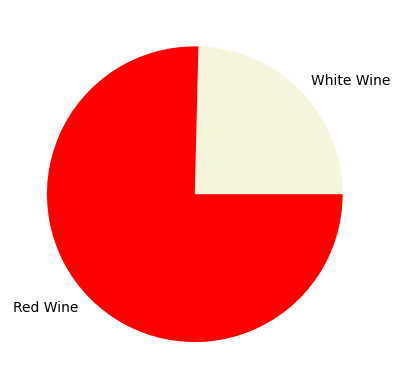

In [4]:
import matplotlib.pyplot as plt

red_count=red_wine.shape[0]
white_count=white_wine.shape[0]

labels = 'White Wine', 'Red Wine', 
sizes = [red_count, white_count]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=['beige', 'red'])

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype i

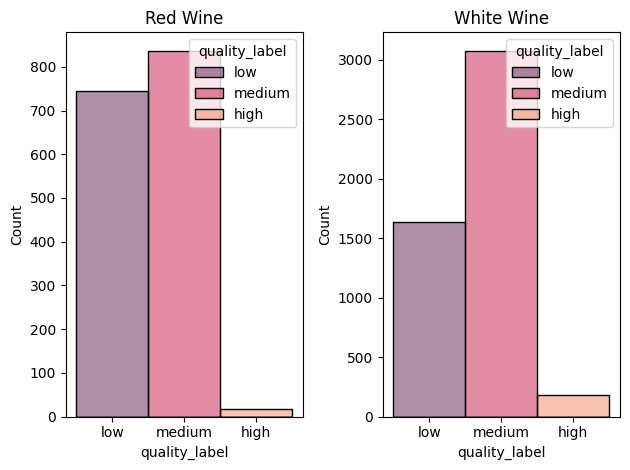

In [5]:
import seaborn as sns



# Create the red wine  histogram with the 'rocket' color palette
plt.subplot(121)  # Subplot 1 (left)
res = sns.histplot(data=red_wine, x='quality_label',hue='quality_label' ,palette='rocket', edgecolor='black')
plt.title('Red Wine')

plt.subplot(122)  # Subplot 2 (right)
res = sns.histplot(data=white_wine, x='quality_label',hue='quality_label', palette='rocket')
plt.title('White Wine')


plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

The 121 is a shorthand notation for specifying the layout of subplots in a Matplotlib figure. It is in the format of nrows, ncols, and index, where:

    nrows: The total number of rows of subplots.
    ncols: The total number of columns of subplots.
    index: The index of the specific subplot you want to create within the grid.

So, in subplot(121), it means you have one row (nrows=1), two columns (ncols=2), and you are referring to the first subplot (index=1) in this 1x2 grid of subplots.

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of obser

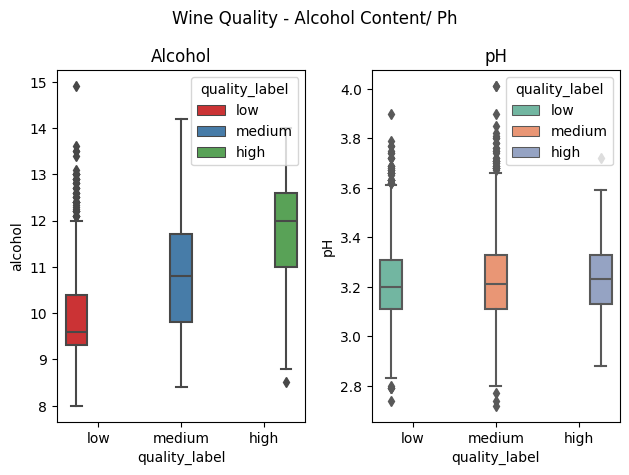

In [6]:
#boxplot


plt.suptitle('Wine Quality - Alcohol Content/ Ph')

plt.subplot(121)
res=sns.boxplot(data=wines, x='quality_label', y='alcohol',hue='quality_label', palette='Set1')
plt.title('Alcohol')

plt.subplot(122)
res=sns.boxplot(data=wines, x='quality_label', y='pH',hue='quality_label', palette='Set2')
plt.title('pH')


plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of obser

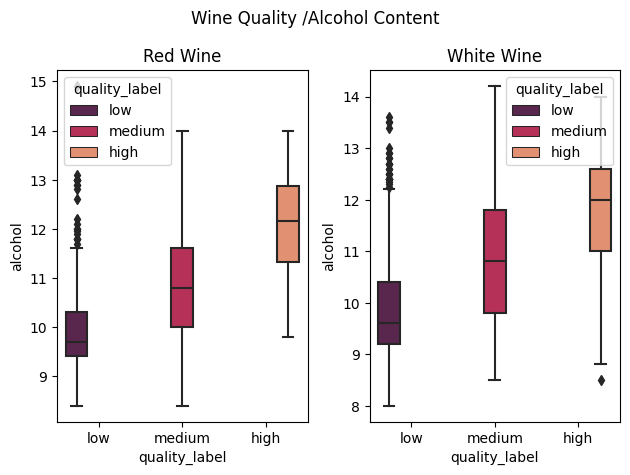

In [7]:
#boxplot


plt.suptitle('Wine Quality /Alcohol Content')

plt.subplot(121)
res=sns.boxplot(data=red_wine, x='quality_label', y='alcohol',hue='quality_label', palette='rocket')
plt.title('Red Wine')

plt.subplot(122)
res=sns.boxplot(data=white_wine, x='quality_label', y='alcohol',hue='quality_label', palette='rocket')
plt.title('White Wine')


plt.tight_layout()  # Ensure the plots don't overlap
plt.show()

/tmp/ipykernel_7666/2766149141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wines.sulphates, bins=15, color='g')
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Axes: xlabel='sulphates', ylabel='Density'>

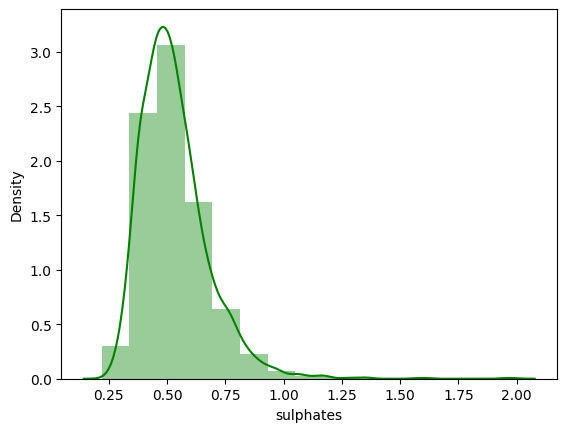

In [8]:
#distplot

sns.distplot(wines.sulphates, bins=15, color='g')

<Axes: >

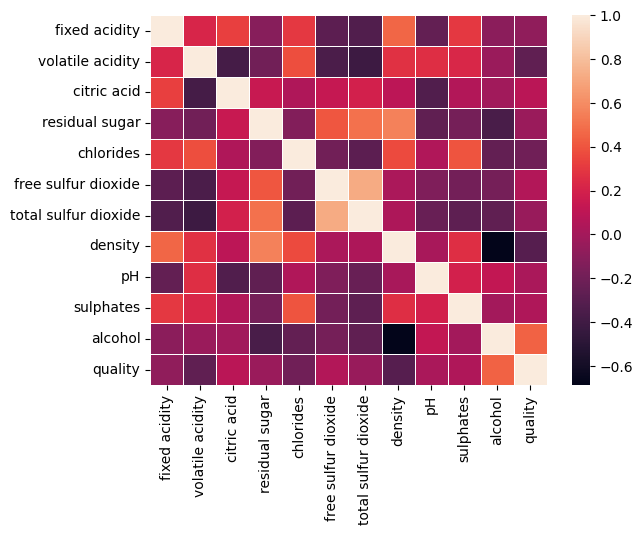

In [9]:
wines=wines.drop(labels='quality_label', axis=1)

sns.heatmap(wines.corr(), cbar=True, linewidth=0.5)